#![Spark Logo](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/logo_spark.png)

**Objective:**
Analyze Desktop vs Mobile traffic to English Wikipedia (continued)

**Time to Complete:**
20 mins

**Data Source:**
pageviews_by_second (<a href="http://datahub.io/en/dataset/english-wikipedia-pageviews-by-second" target="_blank">255 MB</a>)

**Business Questions:**

* Question # 1) How many total incoming requests were to the mobile site vs the desktop site?
* Question # 2) What is the start and end range of time for the pageviews data? How many days of data is in the DataFrame?
* Question # 3) What is the avg/min/max for the number of requests received for Mobile and Desktop views?
* Question # 4) Which day of the week does Wikipedia get the most traffic?
* Question # 5) Can you visualize both the mobile and desktop site requests in a line chart to compare traffic between both sites by day of the week?
* Question # 6) Why is there so much more traffic on Monday vs. other days of the week?

**Technical Accomplishments:**
- Give a DataFrame a human-readable name when caching
- Cast a String col type into a Timestamp col type
- Browse the Spark SQL API docs
- Learn how to use "Date time functions"
- Create and use a User Defined Function (UDF)
- Make a Databricks bar chart visualization
- Join 2 DataFrames
- Make a Matplotlib visualization

**NOTE** Please run this notebook in a Spark 2.0 cluster.

Attach to, and then restart your cluster first to clear out old memory caches and get to a default, standard environment. The restart should take 1 - 2 minutes.

![Restart Cluster](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/restart_cluster.png)

####![Wikipedia Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/logo_wikipedia_tiny.png) ![Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/logo_spark_tiny.png) **Continue Exploring Pageviews By Second**

In this notebook, we will continue exploring the Wikipedia pageviews by second data.

First, change the shuffle.partitions option to 8:

In [6]:
spark.conf.set("spark.sql.shuffle.partitions", "8")

We're going to read the raw pageviews-by-second data. This data is stored in a TSV (tab-separated value), so we can read it using
the add-on [Spark CSV](https://spark-packages.org/package/databricks/spark-csv) package. (Note: In Spark 2.0, this package is no longer an add-on; it's built-in.)

In [8]:
# Lista arquivos
display(dbutils.fs.ls("/databricks-datasets/wikipedia-datasets/data-001/pageviews/raw"))

path,name,size
dbfs:/databricks-datasets/wikipedia-datasets/data-001/pageviews/raw/pageviews_by_second.tsv,pageviews_by_second.tsv,262099389


However, we don't want to let Spark CSV infer the schema, because that requires two passes over the data file. The file isn't huge, but it's more than 200 MB, so two passes is a little slow, especially for a class. So, we're going to specify the schema ourselves. Let's take a quick look at the first couple lines of the file:

In [10]:
display(
  spark.read.text("dbfs:/databricks-datasets/wikipedia-datasets/data-001/pageviews/raw/pageviews_by_second.tsv")
)

value
"""timestamp"" ""site"" ""requests"""
"""2015-03-16T00:09:55"" ""mobile"" 1595"
"""2015-03-16T00:10:39"" ""mobile"" 1544"
"""2015-03-16T00:19:39"" ""desktop"" 2460"
"""2015-03-16T00:38:11"" ""desktop"" 2237"
"""2015-03-16T00:42:40"" ""mobile"" 1656"
"""2015-03-16T00:52:24"" ""desktop"" 2452"
"""2015-03-16T00:54:16"" ""mobile"" 1654"
"""2015-03-16T01:18:11"" ""mobile"" 1720"
"""2015-03-16T01:30:32"" ""desktop"" 2288"


Okay, so the fields appear to be:

* The timestamp, in ISO 8601 format. Unfortunately, Spark SQL can't parse this automatically, so we'll have to treat it as a string and do something ugly (and tricky) to make it into a timestamp.
* The site, which is just "mobile" or "desktop". So that's obviously a string.
* The request count, which is an integer.

We can use this information to craft our own schema, as shown below.

In [12]:
from pyspark.sql.types import *
schema = StructType([
  StructField("timestamp", StringType(), True),
  StructField("site", StringType(), True),
  StructField("requests", IntegerType(), True)
])

As noted above, Spark SQL cannot parse ISO 8601 timestamps. _We_ can, using a `java.text.SimpleDateFormat` format string, but there's no `date_parse` SQL function in the Spark SQL API.

However...

You _can_ parse it with relatively simple workaround. First, you need to use the Spark SQL `unix_timestamp` function, along with
a [SimpleDateFormat](https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html), to parse the ISO 8601 timestamp
into a number representing the _seconds_ since January 1, 1970.

Then, you can simply cast the resulting integer to a timestamp.

In [14]:
from pyspark.sql.functions import *

df0 = (spark.read
            .option('delimiter', "\t")
            .option('header', 'true')
            .schema(schema)
            .csv('dbfs:/databricks-datasets/wikipedia-datasets/data-001/pageviews/raw/pageviews_by_second.tsv'))
df = (df0.select(df0['site'], df0['requests'],
                 unix_timestamp(df0['timestamp'], "yyyy-MM-dd'T'HH:mm:ss").cast('timestamp').alias('timestamp')))
# Note: In versions of Spark prior to 2.0, you'll need to use this code, instead:

#df0 = (sqlContext.read
#                 .format('com.databricks.spark.csv')
#                 .option('delimiter', "\t")
#                 .option('header', 'true')
#                 .schema(schema)
#                 .load('dbfs:/databricks-datasets/wikipedia-datasets/data-001/pageviews/raw/pageviews_by_second.tsv'))
#df = (df0.select(df0['site'], df0['requests'],
#                 unix_timestamp(df0['timestamp'], "yyyy-MM-dd'T'HH:mm:ss").cast('timestamp').alias('timestamp')))

In [15]:
df.show(truncate=False)

+-------+--------+-------------------+
site |requests|timestamp |
+-------+--------+-------------------+
mobile |1595 |2015-03-16 00:09:55|
mobile |1544 |2015-03-16 00:10:39|
desktop|2460 |2015-03-16 00:19:39|
desktop|2237 |2015-03-16 00:38:11|
mobile |1656 |2015-03-16 00:42:40|
desktop|2452 |2015-03-16 00:52:24|
mobile |1654 |2015-03-16 00:54:16|
mobile |1720 |2015-03-16 01:18:11|
desktop|2288 |2015-03-16 01:30:32|
mobile |1609 |2015-03-16 01:32:24|
desktop|2341 |2015-03-16 01:42:08|
mobile |1704 |2015-03-16 01:45:53|
desktop|2554 |2015-03-16 01:55:37|
mobile |1825 |2015-03-16 01:57:29|
desktop|2492 |2015-03-16 02:03:16|
mobile |1667 |2015-03-16 02:10:32|
desktop|2452 |2015-03-16 02:16:45|
desktop|2412 |2015-03-16 02:19:32|
desktop|2350 |2015-03-16 02:20:16|
mobile |1802 |2015-03-16 02:22:08|
+-------+--------+-------------------+
only showing top 20 rows

In [16]:
df.printSchema()

root
-- site: string (nullable = true)
-- requests: integer (nullable = true)
-- timestamp: timestamp (nullable = true)

Now, let's put the data in a more useful order.

In [18]:
pageviews_df = df.orderBy(df['timestamp'], df['site'].desc())

Create a temporary view.

**NOTE**: In Spark 2.0, `registerTempTable` has been renamed to the `createOrReplaceTempView`, which more accurately reflects what it actually does.

In [20]:
pageviews_df.createOrReplaceTempView("pageviews_by_second_ordered")
spark.table("pageviews_by_second_ordered").cache()

# In versions of Spark prior to 2.0, use the following code:

#pageviews_df.registerTempTable('pageviews_by_second_ordered')
#sqlContext.cacheTable('pageviews_by_second_ordered')

Out[ 9 ]: DataFrame[site: string, requests: int, timestamp: timestamp]

Materialize the cache with a `count()` action:

In [22]:
pageviews_df.count() # materialize the cache

Out[ 10 ]: 7200000

You should now see the DataFrame in the Storage UI:

![Clean Name and 3 partitions](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/pageviews/pageviews_cleanname_3partitions.png)

Look at the first 6 rows:

In [26]:
pageviews_df.show(6)

+-------+--------+-------------------+
 site|requests| timestamp|
+-------+--------+-------------------+
 mobile| 1628|2015-03-16 00:00:00|
desktop| 2343|2015-03-16 00:00:00|
 mobile| 1636|2015-03-16 00:00:01|
desktop| 2382|2015-03-16 00:00:01|
 mobile| 1619|2015-03-16 00:00:02|
desktop| 2546|2015-03-16 00:00:02|
+-------+--------+-------------------+
only showing top 6 rows

Verify that the DataFrame is indeed in memory by running a count again:

In [28]:
# This should run in less than a second.
pageviews_df.count()

Out[ 12 ]: 7200000

####![Wikipedia + Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/wiki_spark_small.png) Q-1) How many total incoming requests were to the mobile site vs the desktop site?

First, let's sum up the `requests` column to see how many total requests are in the dataset. We've already imported the SQL functions package, which includes statistical functions like `sum`, `max`, `min`, `avg`, etc.

In [31]:
pageviews_df.select(sum(pageviews_df['requests'])).show()

+-------------+
sum(requests)|
+-------------+
 13342978934|
+-------------+

So, there are about 13.3 billion requests total.

But how many of the requests were for the mobile site?

**Challenge 1:** Using just the commands we learned so far, can you figure out how to filter the DataFrame for just **mobile** traffic and then sum the requests column?

In [35]:
# TODO
# Type your answer here
pageviews_df.filter(pageviews_df['site']=="mobile").groupBy('site').sum('requests').show()

+------+-------------+
 site|sum(requests)|
+------+-------------+
mobile| 4605797962|
+------+-------------+

**Challenge 2:** What about the **desktop** site? How many requests did it get?

In [37]:
# TODO
# Type your answer here
pageviews_df.filter(pageviews_df['site']=="desktop").groupBy('site').sum('requests').show()

+-------+-------------+
 site|sum(requests)|
+-------+-------------+
desktop| 8737180972|
+-------+-------------+

So, about twice as many were for the desktop site.

####![Wikipedia + Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/wiki_spark_small.png) Q-2) What is the start and end range of time for the pageviews data? How many days of data is in the DataFrame?

How many different years is the data from?

For the next command, we'll use `year()`, one of the date time function available in Spark. You can review which functions are available for DataFrames in the <a href="https://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.sql.functions$" target="_blank">Spark API doc's SQL functions</a>, under "Date time functions".

In [42]:
pageviews_df.select(year(pageviews_df["timestamp"])).distinct().show()

+---------------+
year(timestamp)|
+---------------+
 2015|
+---------------+

The data only spans 2015. But which months?

**Challenge 3:** Can you figure out how to check which months of 2015 the data covers (using the <a href="https://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.sql.functions$" target="_blank">Spark API docs</a>)?

In [45]:
# TODO
# Type your answer here
pageviews_df.select(year(pageviews_df["timestamp"]), month(pageviews_df["timestamp"])).distinct().show()

+---------------+----------------+
year(timestamp)|month(timestamp)|
+---------------+----------------+
 2015| 4|
 2015| 3|
+---------------+----------------+

The data covers the months you see above.

Similarly, you can discover how many weeks of timestamps are in the data and how many days of data there is:

In [48]:
# How many weeks of data are there?
pageviews_df.select(weekofyear(pageviews_df["timestamp"])).distinct().show()

+---------------------+
weekofyear(timestamp)|
+---------------------+
 12|
 13|
 14|
 16|
 17|
 15|
+---------------------+

In [49]:
# How many days of data are there?
#pageviews_df.select(dayofyear(pageviews_df["timestamp"])).distinct().show()
pageviews_df.select(dayofyear(pageviews_df["timestamp"])).distinct().count()

Out[ 20 ]: 41

There is 41 days of data.

####![Wikipedia + Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/wiki_spark_small.png) Q-3) What is the avg/min/max for the number of requests received for Mobile and Desktop views?

**Challenge 4**: To understand our data better, let's look at the average, minimum and maximum number of requests received for mobile, then desktop:

In [53]:
# TODO

# Look at mobile statistics: select the average, minimum and maximum number of requests
# Your answer here...

# Mobile
pageviews_df.filter(pageviews_df['site']=="mobile").describe().show()

+-------+-------+------------------+
summary| site| requests|
+-------+-------+------------------+
 count|3600000| 3600000|
 mean| null|1279.3883227777778|
 stddev| null| 259.5132034034651|
 min| mobile| 645|
 max| mobile| 3292|
+-------+-------+------------------+

In [54]:
# TODO

# Look at desktop statistics: select the average, minimum and maximum number of requests
# Your answer here...

# Desktop
pageviews_df.filter(pageviews_df['site']=="desktop").describe().show()

+-------+-------+------------------+
summary| site| requests|
+-------+-------+------------------+
 count|3600000| 3600000|
 mean| null|2426.9947144444445|
 stddev| null| 421.7942603634024|
 min|desktop| 1312|
 max|desktop| 5695|
+-------+-------+------------------+

There certainly appear to be more requests for the desktop site.

By the way, there's a really simple way to get these kinds of summary statistics on numeric columns:

In [57]:
pageviews_df.filter("site = 'mobile'").describe().show()

+-------+-------+------------------+
summary| site| requests|
+-------+-------+------------------+
 count|3600000| 3600000|
 mean| null|1279.3883227777778|
 stddev| null| 259.5132034034651|
 min| mobile| 645|
 max| mobile| 3292|
+-------+-------+------------------+

####![Wikipedia + Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/wiki_spark_small.png) Q-4) Which day of the week does Wikipedia get the most traffic?

Think about how we can accomplish this. We need to pull out the day of the week (like Mon, Tues, etc) from each row, and then sum up all of the requests by day.

First, use the `date_format` function to extract out the day of the week from the timestamp and rename the column as "Day of week".

Then we'll sum up all of the requests for each day and show the results.

In [61]:
# Notice the use of alias() to rename the new column
# "E" is a pattern in the SimpleDataFormat class in Java that extracts out the "Day in Week""

# Create a new DataFrame named pageviews_by_day_of_week_df and cache it
pageviews_by_day_of_week_df = pageviews_df.groupBy(date_format((pageviews_df["timestamp"]), "E").alias("Day of week")).sum()

# Cache the DataFrame with a human-readable name
pageviews_by_day_of_week_df.createOrReplaceTempView("pageviews_by_DOW")
spark.table("pageviews_by_DOW").cache()

# Prior to Spark 2.0:
#pageviews_by_day_of_week_df.registerTempTable("pageviews_by_DOW")
#sqlContext.cacheTable("pageviews_by_DOW")

# Show what is in the new DataFrame
pageviews_by_day_of_week_df.show()

+-----------+-------------+
Day of week|sum(requests)|
+-----------+-------------+
 Wed| 1977615396|
 Sun| 1576726066|
 Sat| 1662762048|
 Thu| 1931508977|
 Mon| 2356818845|
 Tue| 1995034884|
 Fri| 1842512718|
+-----------+-------------+

You can learn more about date/time patterns, like "E", in the <a href="https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html" target="_blank">Java SimpleDateFormat</a> documentation.

It would help to visualize the results:

In [64]:
display(pageviews_by_day_of_week_df.orderBy("Day of week"))

Day of week,sum(requests)
Fri,1842512718
Mon,2356818845
Sat,1662762048
Sun,1576726066
Thu,1931508977
Tue,1995034884
Wed,1977615396


Click on the Bar chart icon above to convert the table into a bar chart:

#![Bar Chart](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/pageviews/barchart_icon.png)

Under the "Plot Options" button above, you might also need to set the Keys as "Day of week" and the values as "sum(requests)".

Hmm, the ordering of the days of the week is off, because the `orderBy()` operation is ordering the days of the week alphabetically. Instead of that, let's start with Monday and end with Sunday. To accomplish this, we'll write a short User Defined Function (UDF) to prepend each `Day of week` with a number.

####![Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/logo_spark_tiny.png) **User Defined Functions (UDFs)**

A UDF lets you code your own logic for processing column values during a DataFrame query.

First, let's create a function to map a named day of the week into something with a numeric prefix:

In [70]:
_dow = {"Mon": "1", "Tue": "2", "Wed": "3", "Thu": "4", "Fri": "5", "Sat": "6", "Sun": "7"}
def map_day_of_week(day):
  n = _dow.get(day)
  if n:
    return n + "-" + day
  else:
    return "UNKNOWN"

Test the match expression:

In [72]:
map_day_of_week("Tue")

Out[ 27 ]: '2-Tue'

Great, it works! Now define a UDF that wraps this function:

In [74]:
prepend_number_udf = udf(map_day_of_week)

Test the UDF to prepend the `Day of Week` column in the DataFrame with a number:

In [76]:
pageviews_by_day_of_week_df.select(prepend_number_udf(pageviews_by_day_of_week_df["Day of week"])).show(7)

+----------------------------+
map_day_of_week(Day of week)|
+----------------------------+
 3-Wed|
 7-Sun|
 6-Sat|
 4-Thu|
 1-Mon|
 2-Tue|
 5-Fri|
+----------------------------+

Our UDF looks like it's working. Next, let's apply the UDF and also order the x axis from Mon -> Sun:

In [78]:
df0 = pageviews_by_day_of_week_df.withColumnRenamed("sum(requests)", "total requests")
display(
  df0.select(prepend_number_udf(df0["Day of week"]).alias("dow"), df0["total requests"])
     .orderBy("dow")
)

dow,total requests
1-Mon,2356818845
2-Tue,1995034884
3-Wed,1977615396
4-Thu,1931508977
5-Fri,1842512718
6-Sat,1662762048
7-Sun,1576726066


Click on the bar chart icon again to convert the above table into a Bar Chart. Also, under the Plot Options, you may need to set the Keys as "UDF(Day of week)" and the values as "total requests".

Wikipedia seems to get significantly more traffic on Mondays than other days of the week. Hmm...

### This is a _completely unnecessary_ UDF.

In general, don't write UDFs if built-in functions will do. We could have accomplished the exact same thing using one of the built-in
functions in `org.apache.spark.sql.functions`.

**Challenge 4**: Take a look at <http://spark.apache.org/docs/1.6.2/api/scala/index.html#org.apache.spark.sql.functions$> and try to figure out a way to create the same plot _without_ using a UDF.

In [82]:
# TODO
# Type your answer here

# https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html
pageviews_by_day_of_week_df_2 = pageviews_df.groupBy(
  concat(
    date_format((pageviews_df["timestamp"]), "u"), lit("-"), date_format((pageviews_df["timestamp"]), "E")
  ).alias("Week")
).sum("requests").orderBy("Week")

pageviews_by_day_of_week_df_2.show()

+-----+-------------+
 Week|sum(requests)|
+-----+-------------+
1-Mon| 2356818845|
2-Tue| 1995034884|
3-Wed| 1977615396|
4-Thu| 1931508977|
5-Fri| 1842512718|
6-Sat| 1662762048|
7-Sun| 1576726066|
+-----+-------------+

####![Wikipedia + Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/wiki_spark_small.png) Q-5) Can you visualize both the mobile and desktop site requests in a line chart to compare traffic between both sites by day of the week?

First, graph the mobile site requests:

In [85]:
df0 = (pageviews_df.filter("site = 'mobile'")
                   .groupBy(date_format((pageviews_df["timestamp"]), "u-E").alias("Day of week"))
                   .sum()
                   .withColumnRenamed("sum(requests)", "mobile requests"))
mobile_views_by_day_of_week_df = df0.select(df0["Day of week"], df0["mobile requests"]).orderBy("Day of week")

In [86]:
display(mobile_views_by_day_of_week_df)

Day of week,mobile requests
1-Mon,790026669
2-Tue,648087459
3-Wed,631284694
4-Thu,625338164
5-Fri,635169886
6-Sat,646334635
7-Sun,629556455


Click on the bar chart icon again to convert the above table into a Bar Chart.

Also, under the Plot Options, you may need to set the Keys as "DOW" and the values as "mobile requests".

With a DataFrame for mobile views, let's create one more for desktops:

In [89]:
df0 = (pageviews_df.filter("site = 'desktop'")
                   .groupBy(date_format((pageviews_df["timestamp"]), "u-E").alias("Day of week"))
                   .sum()
                   .withColumnRenamed("sum(requests)", "desktop requests"))
desktop_views_by_day_of_week_df = df0.select(df0["Day of week"], df0["desktop requests"]).orderBy("Day of week")

We now have two DataFrames:
* **desktopViewsByDayOfWeekDF**
* **mobileViewsByDayOfWeekDF**

We can then perform a join on the two DataFrames to create a thrid DataFrame, **allViewsByDayOfWeekDF**

In [91]:
# join pela coluna "Day of week"
all_views_by_day_of_week_df = (
  mobile_views_by_day_of_week_df
    .join(desktop_views_by_day_of_week_df,
          mobile_views_by_day_of_week_df["Day of week"] == desktop_views_by_day_of_week_df["Day of week"])
)

And lastly, we can create a line chart to visualize mobile vs. desktop page views:

In [93]:
display(all_views_by_day_of_week_df)

Day of week,mobile requests,Day of week,desktop requests
7-Sun,629556455,7-Sun,947169611
3-Wed,631284694,3-Wed,1346330702
4-Thu,625338164,4-Thu,1306170813
1-Mon,790026669,1-Mon,1566792176
6-Sat,646334635,6-Sat,1016427413
2-Tue,648087459,2-Tue,1346947425
5-Fri,635169886,5-Fri,1207342832


Click on the line chart icon above to convert the table into a line chart:

#![Line Chart 1](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/pageviews/linechart_1.png)

Then click on Plot Options:

#![Line Chart 2](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/pageviews/linechart_2.png)

Finally customize the plot as seen below and click Apply:

*(You will have to drag and drop fields from the left pane into either Keys or Values)*

#![Line Chart 3](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/pageviews/linechart_3.png)

Hmm, did you notice that the line chart is a bit deceptive? Beware that it looks like there were almost zero mobile site requests because the y-axis of the line graph starts from 600,000,000 instead of 0.

<img src="http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/pageviews/linechart_4.png" style="height: 300px" alt="Line chart 4"/>

Since the y-axis is off, it may appear as if there were almost zero mobile site requests. We can restore a zero baseline by using Matplotlib. But first...

####![Wikipedia + Spark Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/wiki_spark_small.png) Q-6) Why is there so much more traffic on Monday vs. other days of the week?

** Challenge 5:** Can you figure out exactly why there was so much more traffic on Mondays?

In [101]:
# Type your answer here

####![Databricks Logo Tiny](http://curriculum-release.s3-website-us-west-2.amazonaws.com/wiki-book/general/logo_databricks_tiny.png) Bonus: Matplotlib visualization

Let's use Matplotlib to fix the line chart visualization above so that the y-axis starts with 0.

You can also import Matplotlib and easily create more sophisticated plots:

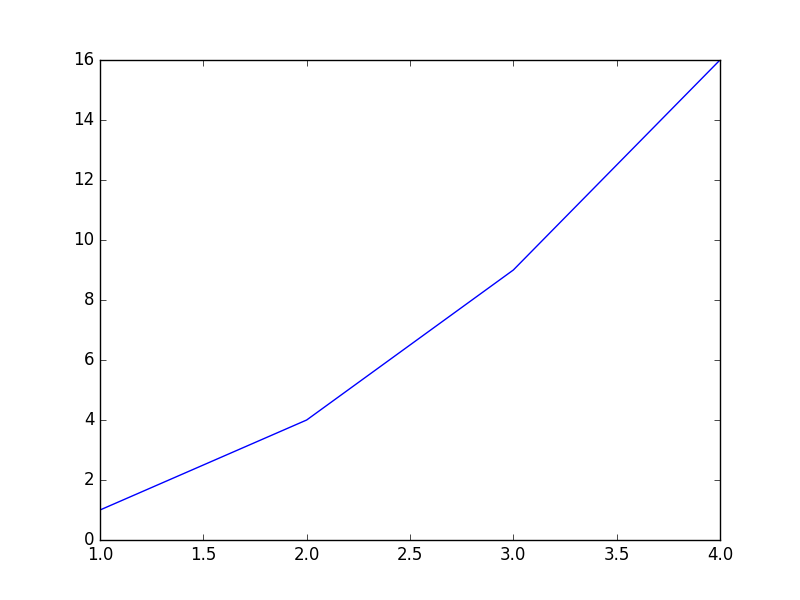

In [105]:
%python
import numpy as np
import matplotlib.pyplot as plt

fig1, ax = plt.subplots()

# The first list of four numbers is for the x-axis and the next list is for the y-axis
ax.plot([1,2,3,4], [1,4,9,16])

display(fig1)

Recall that we had earlier created 2 DataFrames, one with desktop views by day of week and another with mobile views by day of week:

In [107]:
desktop_views_by_day_of_week_df.show()

+-----------+----------------+
Day of week|desktop requests|
+-----------+----------------+
 1-Mon| 1566792176|
 2-Tue| 1346947425|
 3-Wed| 1346330702|
 4-Thu| 1306170813|
 5-Fri| 1207342832|
 6-Sat| 1016427413|
 7-Sun| 947169611|
+-----------+----------------+

In [108]:
mobile_views_by_day_of_week_df.show()

+-----------+---------------+
Day of week|mobile requests|
+-----------+---------------+
 1-Mon| 790026669|
 2-Tue| 648087459|
 3-Wed| 631284694|
 4-Thu| 625338164|
 5-Fri| 635169886|
 6-Sat| 646334635|
 7-Sun| 629556455|
+-----------+---------------+

First let's graph only the desktop views by day of week:

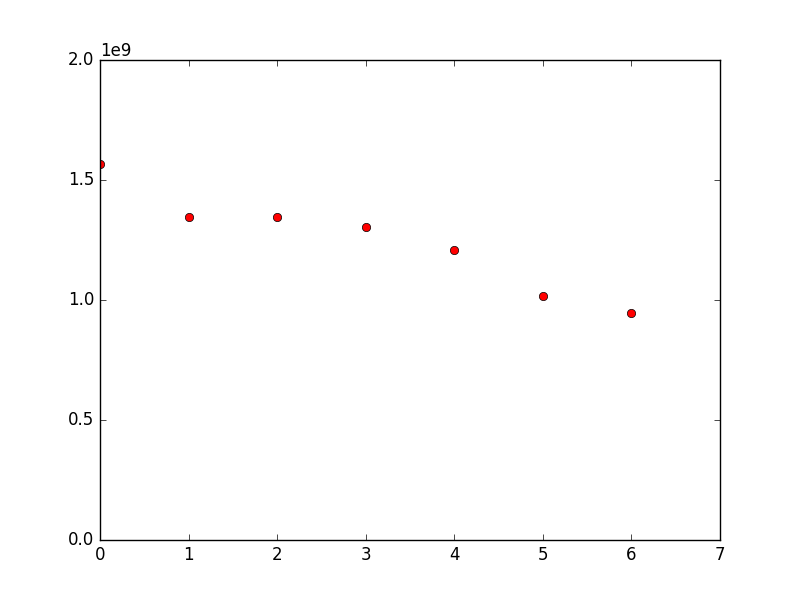

In [110]:
%python
fig2, ax = plt.subplots()

# Notice that we are providing the coordinate manually for the x-axis
ax.plot([0,1,2,3,4,5,6], [1566792176,1346947425,1346330702,1306170813,1207342832,1016427413,947169611], 'ro')

# The axis() command takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes
ax.axis([0, 7, 0, 2000000000])

display(fig2)

Next graph only the mobile views by day of week:

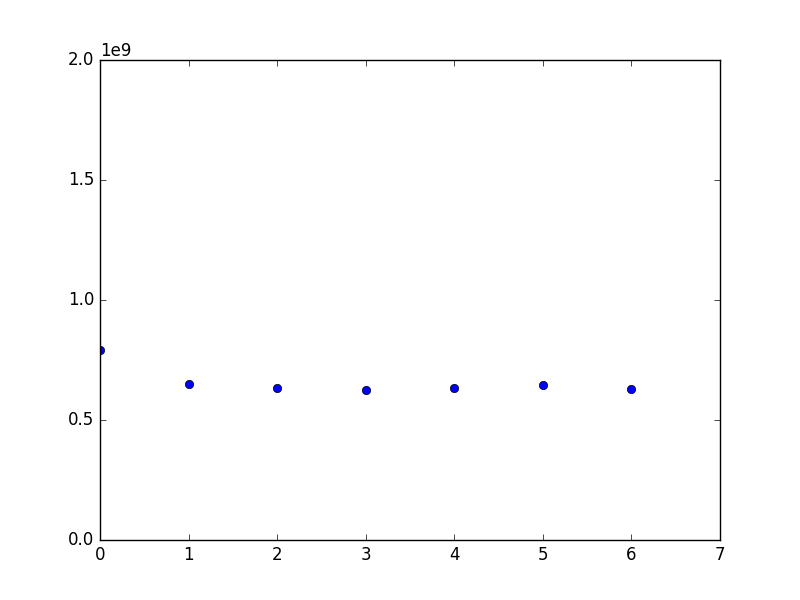

In [112]:
%python
fig3, ax = plt.subplots()
ax.plot([0,1,2,3,4,5,6], [790026669,648087459,631284694,625338164,635169886,646334635,629556455], 'bo')

# The axis() command takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes
ax.axis([0, 7, 0, 2000000000])

display(fig3)

Finally, let's combine the 2 plots above and also programatically get the requests data from a DataFrame (instead of manually entering the y-axis corrdinates).

We need a technique to access the Scala DataFrames from the Python cells. To do this, we can register a temporary table in Scala, then call that table from Python.

In [114]:
mobile_views_by_day_of_week_df.createOrReplaceTempView("mobileViewsByDOW")
desktop_views_by_day_of_week_df.createOrReplaceTempView("desktopViewsByDOW")

# Remember: Prior to Spark 2.0, you have to use:
#mobile_views_by_day_of_week_df.registerTempTable("mobileViewsByDOW")
#desktop_views_by_day_of_week_df.registerTempTable("desktopViewsByDOW")

In [115]:
%python
mobile_df = spark.read.table("mobileViewsByDOW")
mobile_requests = [list(r)[1] for r in mobile_df.collect()] #Faz collect para trazer todos os dados distribuídos para a máquina Driver pois estamos rodando Python e não PySpark

desktop_df = spark.read.table("desktopViewsByDOW")
desktop_requests = [list(r)[1] for r in desktop_df.collect()]

print(mobile_requests, desktop_requests)

([790026669, 648087459, 631284694, 625338164, 635169886, 646334635, 629556455], [1566792176, 1346947425, 1346330702, 1306170813, 1207342832, 1016427413, 947169611])

We now have our two Python lists. We can use them to plot.

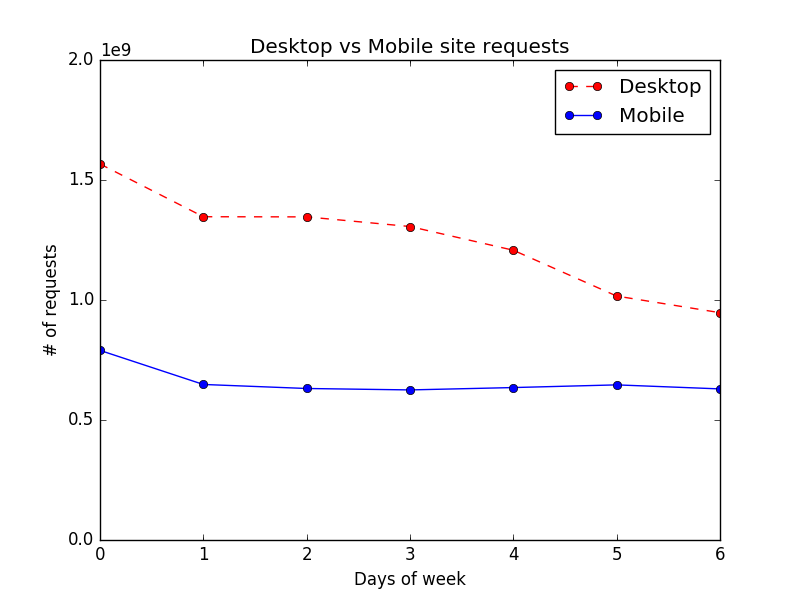

In [117]:
%python
fig3, ax = plt.subplots()

x_axis = [0,1,2,3,4,5,6]

ax.plot(x_axis, desktop_requests, marker='o', linestyle='--', color='r', label='Desktop')
ax.plot(x_axis, mobile_requests, marker='o', label='Mobile')

ax.set_title('Desktop vs Mobile site requests')

ax.set_xlabel('Days of week')
ax.set_ylabel('# of requests')

ax.legend()

# The axis() command takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes
ax.axis([0, 6, 0, 2000000000])

ax.xaxis.set_ticks(range(len(x_axis)), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

display(fig3)